Homomorphe Verschlüsselung in Neuronalen Netzen
===
XOR lösen durch ML
---
Dieses Notebook dient als ein einsteigerfreundliches Beispiel für die Verwendung von homomorph verschlüsselten Daten durch ein simples Neuronales Netz. Als leichtes Beispiel wurde hierfür die Aufgabe ausgewählt mit einem Neuronalen Netz ein XOR Bauteil nachzustellen. Dies bedeutet, dass zwei Eingaben und eine Ausgabe vorhanden sein müssen in diesem Netz.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import tenseal as ts

X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])

learning_rate = 1
n = 2

np.random.seed(1)

w1 = np.random.rand(2,2)
w2 = np.random.rand(1,2)
b1 = np.zeros((2, 1))
b2 = np.zeros((1, 1))

losses = []

In einem Neuralen Netz gibt es neben den linearen Schichten auch einen nicht-linearen Anteil, die Aktivierungsfunktionen. Meistens wird an dieser Stelle eine Funktion gewählt, welche die Eingabe in eine Zahl in einem festgelegt Intervall übersetzt. In diesem Fall zwischen 0 und 1.

In [41]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1 - sigmoid(x))

Nun können die zwei wichtigsten Funktionen eines Neuronalen Netz erstellt werden, die Forward und Backward Propagation.

In [42]:
def forward(w1, w2, x):
    z1 = np.add(np.dot(w1, x), b1)
    a1 = sigmoid(z1)
    z2 = np.add(np.dot(w2, a1), b2)
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

def backward(w1, w2, z1, a1, z2, a2, x, y):
    dz2 = a2 - y
    dw2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis = 1, keepdims = True)
    da1 = np.dot(w2.T, dz2)

    dz1 = np.multiply(da1, sigmoid_prime(z1))
    dw1 = np.dot(dz1, x.T)
    db1 = np.sum(dz1, axis = 1, keepdims = True)

    return dw1, db1, dw2, db2

Das Modell beziehungsweise die Gewichte im Netz werden trainiert durch die zwei erstellten Funktionen.

Text(0, 0.5, 'Loss value')

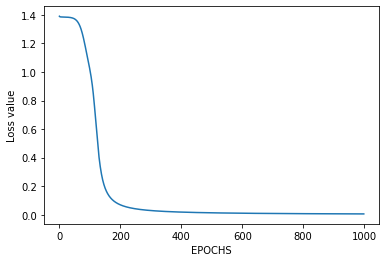

In [43]:
iterations = 1000
for i in range(iterations):
    z1, a1, z2, a2 = forward(w1, w2, X)
    loss = -(1 / n) * np.sum(Y * np.log(a2) + (1 - Y) * np.log(1 - a2))
    losses.append(loss)

    dw1, db1, dw2, db2 = backward(w1,w2,z1,a1,z2,a2,X,Y)

    w2 = w2 - learning_rate * dw2
    w1 = w1 - learning_rate * dw1
    b2 = b2 - learning_rate * db2
    b1 = b1 - learning_rate * db1

plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")        

In [44]:
def predict(w1,w2,input):
    z1,a1,z2,a2 = forward(w1,w2,test)
    a2 = np.squeeze(a2)
    if a2>=0.5:
        print([i[0] for i in input], " --> 1")
    else:
        print([i[0] for i in input], " --> 0")

test = np.array([[0],[0]])
predict(w1,w2,test)
test = np.array([[0],[1]])
predict(w1,w2,test)
test = np.array([[1],[0]])
predict(w1,w2,test)
test = np.array([[1],[1]])
predict(w1,w2,test)

[0, 0]  --> 0
[0, 1]  --> 1
[1, 0]  --> 1
[1, 1]  --> 0


Das Testen auf allen vier XOR Möglichkeiten zeigt, dass das Modell für Eingaben korrekte Ausgaben produzieren kann.

Inferenz auf Verschlüsselten Daten
===
Approximation
---
In dem nächsten Teil soll die implementierte Version eines Neuronalen Netz für die Abbildung eines XOR Gates verwendet werden mit verschlüsselten Daten. Hierfür muss die Aktivierungsfunktion ausgetauscht werden, da die darin verwendeten arithmetischen Operationen nicht kompatibel sind mit homomorpher Verschlüsselung. Um dies zu erreichen kann zum Beispiel die bisher verwendete Aktivierungsfunktion approximiert werden.

In [48]:
w1_Approx = np.random.rand(2,2)
w2_Approx = np.random.rand(1,2)
b1_Approx = np.zeros((2, 1))
b2_Approx = np.zeros((1, 1))

def approx_sigmoid(x):
    return 0.5 + 0.197 * x - 0.0004 * (x*x*x)

def approx_sigmoid_prime(x):
    return approx_sigmoid(x)*(1 - approx_sigmoid(x))

Als nächstes müssen nur noch kleinere Änderungen vorgenommen werden in der forward und backward Funktion.

In [49]:
def forward_Approx(w1, w2, x):
    z1 = np.add(np.dot(w1, x), b1_Approx)
    a1 = approx_sigmoid(z1)
    z2 = np.add(np.dot(w2, a1), b2_Approx)
    a2 = approx_sigmoid(z2)
    
    return z1, a1, z2, a2

def backward_Approx(n, w1, w2, z1, a1, z2, a2, x, y):
    dz2 = a2 - y
    dw2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis = 1, keepdims = True)

    da1 = np.dot(w2.T, dz2)
    dz1 = np.multiply(da1, approx_sigmoid_prime(z1))
    dw1 = np.dot(dz1, x.T)
    db1 = np.sum(dz1, axis = 1, keepdims = True)

    return dw1, db1, dw2, db2

Nach den Anpassungen kann das Modell mit der approximierten Sigmoid Funktion trainiert werden.

In [52]:
iterations = 10000
for i in range(iterations):
    z1, a1, z2, a2 = forward_Approx(w1_Approx, w2_Approx, X)

    dw1, db1, dw2, db2 = backward_Approx(n,w1_Approx,w2_Approx,z1,a1,z2,a2,X,Y)

    w2_Approx = w2_Approx - learning_rate * dw2
    w1_Approx = w1_Approx - learning_rate * dw1
    b2_Approx = b2_Approx - learning_rate * db2
    b1_Approx = b1_Approx - learning_rate * db1

Nachdem das Modell trainiert ist können die verschlüsselten Eingaben in dem Modell verarbeitet werden. Hierzu müssen aber die Eingaben verschlüsselten werden unter Berücksichtigung, welche Berechnungen in dem Netz durchgeführt werden. Lineare Schichten können hierbei ignoriert werden, da diese nur Multiplikation mit unverschlüsselten Werten darstellt. Wichtiger ist die approximierte Aktivierungsfunktion, denn in dieser werden die jeweiligen Eingaben mit sich selbst multipliziert. Dies sorgt für ein höheres Rauschen in den verschlüsselten Daten, das Überwunden werden kann, indem die verschlüsselten Objekte genügend Bits zugeteilt werden.

In [53]:
poly_mod_degree = 32768
bits_scale = 40

coeff_mod_bit_sizes=[60, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, 60]
ctx_training = ts.context(ts.SCHEME_TYPE.CKKS, poly_mod_degree, -1, coeff_mod_bit_sizes)

ctx_training.global_scale = pow(2, bits_scale)
ctx_training.generate_galois_keys()

array = [[0,0], [0,1], [1,0], [1,1]]

for input in array:
    first = ts.ckks_vector(ctx_training, [input[0]])
    second = ts.ckks_vector(ctx_training, [input[1]])
    test = np.array([[first],[second]])
    z1,a1,z2,a2 = forward_Approx(w1_Approx,w2_Approx,test)
    if a2[0][0].decrypt()[0] >= 0.5:
        print(input, " --> 1")
    else:
        print(input, " --> 0")

[0, 0]  --> 0
[0, 1]  --> 1
[1, 0]  --> 1
[1, 1]  --> 0


Für die gegebene Testeingabe wurde die korrekte Ausgabe erzeugt, wodurch bestätigt ist, dass die Approximation von der Sigmoid Funktion in diesem Beispiel erfolgreich eingesetzt werden kann.
Probleme mit Approximation
* Sehr große Verschlüsselung nötig, um die Berechnungen durchzuführen
* Dauert länger für nur eine Berechnung als die vier unverschlüsselten Beispiele

Niedrige nicht lineare Funktion
---
Die nächste Idee stammt aus dem CryptoNet Paper und verwendet anstatt der approximierten Funktion eine Square Function. Dies liegt daran, dass bei einer solchen nicht linearen Funktion die Eingabe nur einmal mit sich selbst multipliziert werden muss. Am Ende des Netzs wurd auch im CryptoNet Modell eine Sigmoid Funktion eingesetzt, um die Backpropagation gut berechnen zu können. Diese Funktion kann aber nach dem Training wieder entfernt werden, denn diese bietet keinen Mehrwert für das eigentliche Ergebnis der Verarbeitung.

In [27]:
w1_Square = np.random.rand(2,2)
w2_Square = np.random.rand(1,2)
b1_Square = np.zeros((2, 1))
b2_Square = np.zeros((1, 1))

def square(x):
    return np.square(x)

def square_prime(x):
    return 2 * x

def sigmoid(x):
    return 1/(1 + np.exp(-x))

Die neue Architektur des Neuronalen Netz beinhaltet nun nach der versteckten Schicht eine Square Function. Genauso wurde in der Backward Funktion anstatt mit der Ableitung der Sigmoid Funktion mit der Ableitung der Square Funktion gearbeitet.

In [28]:
def forward_Square(w1, w2, x):
    z1 = np.add(np.dot(w1, x), b1_Square)
    a1 = square(z1)
    z2 = np.add(np.dot(w2, a1), b2_Square)
    a2 = sigmoid(z2)
    
    return z1, a1, z2, a2

def backward_Square(n, w1, w2, z1, a1, z2, a2, x, y):
    dz2 = a2 - y
    dw2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis = 1, keepdims = True)

    da1 = np.dot(w2.T, dz2)
    dz1 = np.multiply(da1, square_prime(z1))
    dw1 = np.dot(dz1, x.T)
    db1 = np.sum(dz1, axis = 1, keepdims = True)

    return dw1, db1, dw2, db2

Die neue Netzarchitektur kann wie in den letzten Beispiel trainiert werden.

In [29]:
iterations = 100
for i in range(iterations):
    z1, a1, z2, a2 = forward_Square(w1_Square, w2_Square, X)

    dw1, db1, dw2, db2 = backward_Square(n,w1_Square,w2_Square,z1,a1,z2,a2,X,Y)

    w2_Square = w2_Square - learning_rate * dw2
    w1_Square = w1_Square - learning_rate * dw1
    b2_Square = b2_Square - learning_rate * db2
    b1_Square = b1_Square - learning_rate * db1  

Bevor das Modell verschlüsselte Daten verarbeitet, wird die Funktionalität auf den unverschlüsselten Eingaben erprobt. Dies liegt daran, dass die Netzarchitektur sich stärker im Vergleich zum Approximationsansatz geändert hat.

In [30]:
def predict(w1,w2,input):
    z1,a1,z2,a2 = forward_Square(w1_Square,w2_Square,test)
    a2 = np.squeeze(a2)
    if a2>=0.5:
        print([i[0] for i in input], " --> 1")
    else:
        print([i[0] for i in input], " --> 0")

test = np.array([[0],[0]])
predict(w1,w2,test)
test = np.array([[0],[1]])
predict(w1,w2,test)
test = np.array([[1],[0]])
predict(w1,w2,test)
test = np.array([[1],[1]])
predict(w1,w2,test)

[0, 0]  --> 0
[0, 1]  --> 1
[1, 0]  --> 1
[1, 1]  --> 0


Durch den Test wird ersichtlich, dass das neue Modell die Eingaben korrekt verarbeiten kann. Dies bedeutet, dass als nächstes die Sigmoid Funktion im Modell entfernt werden kann und damit bereit ist für die verschlüsselten Testdaten.

In [31]:
def forward_Square(w1, w2, x):
    z1 = np.add(np.dot(w1, x), b1_Square)
    a1 = square(z1)
    z2 = np.add(np.dot(w2, a1), b2_Square)
    return z2

Im Vergleich sieht man an der Verschlüsselung, dass deutlich an der Größe der verschlüsselten Objekte gespart werden kann. Das resultierende Ergebnis des Modells wird nach der Entschlüsselung noch mit der Sigmoid Funktion bearbeitet, wodurch die Ausgabe leichter zu interpretieren ist.

In [32]:
bits_scale = 26
context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=8192,
    coeff_mod_bit_sizes=[31, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, 31]
)
context.global_scale = pow(2, bits_scale)
context.generate_galois_keys()

array = [[0,0], [0,1], [1,0], [1,1]]

for input in array:
    first = ts.ckks_vector(context, [input[0]])
    second = ts.ckks_vector(context, [input[1]])
    test = np.array([[first],[second]])
    
    z2 = forward_Square(w1_Square,w2_Square,test)
    result = z2[0][0].decrypt()[0]
    if sigmoid(result) >= 0.5:
        print(input, " --> 1")
    else:
        print(input, " --> 0")

[0, 0]  --> 0
[0, 1]  --> 1
[1, 0]  --> 1
[1, 1]  --> 0


Die Ausgabe ist korrekt und zeigt damit, dass auch eine niedrige nicht lineare Funktion erfolgreich eingesetzt werden kann. Im Vergleich zu der Approximation, wurde nicht nur die Größe der verschlüsselten Daten sondern auch die Laufzeit der Vorhersage verbessert.

Funktions Sampling
---
Die letzte Möglichkeit ist alle möglichen Eingabewerte für die Aktivierungsfunktion vor dem Verwenden des Netzes zu berechnen und abzuspeichern. Dann kann während der Verwendung ein Table Lookup durchgeführt werden, um die passenden Werte zu erhalten. Vorteil dabei ist, dass keine Berechnung wie in den letzten beiden Möglichkeiten durchgeführt werden muss. Nachteil ist, dass sehr viele Werte berechnet und ebenfalls verschlüsselt werden müssen, da der Aufruf durch verschlüsselte Daten geschieht. Ein Beispiel dafür gibt es in diesem [Paper](https://eprint.iacr.org/2018/202.pdf).